In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.listdir ()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Data',
 'Decision Tree.ipynb',
 'Decision_tree',
 'Decision_tree.pdf',
 'Figures',
 'Figures.ipynb',
 'image',
 'image.pdf',
 'md',
 'readme']

In [5]:
basedir = os.getcwd()
datadir = basedir + '/Data'

print(basedir)
print(datadir)

C:\Users\Ale P\Documents\microbiomeproject
C:\Users\Ale P\Documents\microbiomeproject/Data


In [6]:
os.listdir(datadir)

['features_processed.csv',
 'labels_processed.csv',
 'microbiome_data.csv',
 'otu_annotation.csv',
 'sample_desc_deid.csv',
 'X_processed.csv',
 'y2_processed.csv',
 'y_processed.csv']

In [7]:
microbiome_data = pd.read_csv(datadir + '/microbiome_data.csv', index_col = 0)
otu_annotation = pd.read_csv(datadir + '/otu_annotation.csv', index_col = 0)
sample_desc_deid = pd.read_csv(datadir +'/sample_desc_deid.csv', index_col = 0)

In [8]:
sample_desc_deid.columns

Index(['BarcodeSequence', 'LinkerPrimerSequence', 'BodySite', 'SubjectID',
       'GestDayColl', 'GestWeekColl', 'TrimColl', 'intra_ut_fetal_demise',
       'History_of_preterm_delivery', 'Withdrew', 'Gdwithdrawal',
       'GWwithdrawal', 'Delivered', 'GestDayDel', 'GestWeekdel',
       'Labor_Initiation', 'Indication', 'PPROM', 'Chorioamnionitis',
       'Endometritis', 'Hypertensive Disorder', 'Preeclampsia',
       'Birthweight_kg', 'Length_at_birth', 'Number_of_babies', 'Race',
       'Ethnicity', 'ReversePrimer', 'Saliva_volume_uL',
       'Note_any_concerns_regarding_the_specimen', 'Run_No',
       'Number_within_run', 'Bead_Beating_Time', 'Description'],
      dtype='object')

In [10]:
data

NameError: name 'data' is not defined

In [11]:
sample_desc_deid['Birthweight_kg'].value_counts()

2.500    254
3.290    206
2.780    206
3.260    204
3.110    198
3.710    160
3.510    156
3.670    153
4.230    152
3.480    146
2.850    139
3.800    138
2.590    137
3.310    130
3.570    128
2.930    122
2.900    117
1.540    116
2.570    110
3.430    108
2.410    104
3.180     99
3.230     98
2.240     90
3.125     89
2.810     60
0.540     52
3.105     45
3.070     42
3.560     41
1.580     38
3.380     27
0.000     25
3.360     21
3.250     18
3.600      4
Name: Birthweight_kg, dtype: int64

In [21]:
sample_desc_deid[['Race', 'Birthweight_kg']].drop_duplicates()

,Race,Birthweight_kg
#SampleID,,
1000201108,White,NaN
1000501278,Asian-Japanese,3.290
1000301298,American Indian,3.260
1000401368,White,3.380
1000601178,White,3.480
1001001098,Black,NaN
1000001010,NaN,NaN
1000801248,White,3.125
1000901308,White,3.110


In [22]:
sample_desc_deid['Race'].nunique()

9

C:\Users\Ale P\Coding_AI4ALL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Asian-Japanese'),
  Text(2, 0, 'American Indian'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Asian-Unspecified'),
  Text(5, 0, 'Pacific Islander'),
  Text(6, 0, 'Other (Specify below)'),
  Text(7, 0, 'Asian-Chinese'),
  Text(8, 0, 'Indian')])

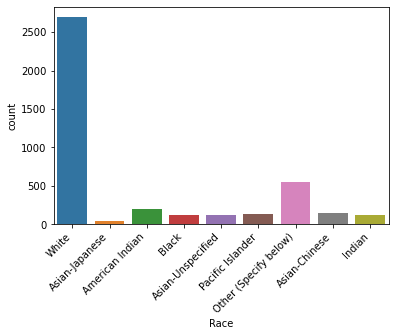

In [24]:
sns.countplot(sample_desc_deid['Race'])
plt.xticks(rotation = 45, ha = 'right')
plt.savefig(basedir + '/Figures/race.png')

C:\Users\Ale P\Coding_AI4ALL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.54'),
  Text(2, 0, '1.54'),
  Text(3, 0, '1.58'),
  Text(4, 0, '2.24'),
  Text(5, 0, '2.41'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.57'),
  Text(8, 0, '2.59'),
  Text(9, 0, '2.78'),
  Text(10, 0, '2.81'),
  Text(11, 0, '2.85'),
  Text(12, 0, '2.9'),
  Text(13, 0, '2.93'),
  Text(14, 0, '3.07'),
  Text(15, 0, '3.105'),
  Text(16, 0, '3.11'),
  Text(17, 0, '3.125'),
  Text(18, 0, '3.18'),
  Text(19, 0, '3.23'),
  Text(20, 0, '3.25'),
  Text(21, 0, '3.26'),
  Text(22, 0, '3.29'),
  Text(23, 0, '3.31'),
  Text(24, 0, '3.36'),
  Text(25, 0, '3.38'),
  Text(26, 0, '3.43'),
  Text(27, 0, '3.48'),
  Text(28, 0, '3.51'),
  Text(29, 0, '3.56'),
  Text(30, 0, '3.57'),
  Text(31, 0, '3.6'),
  Text(32, 0, '3.67'),
  Text(33, 0, '3.71'),
  Text(34, 0, '3.8'),
  Text(35, 0, '4.23')])

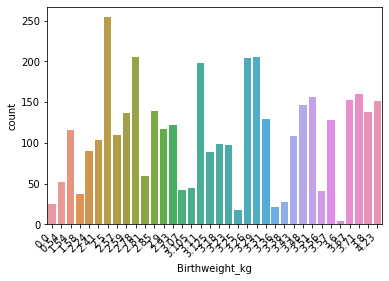

In [25]:
sns.countplot(sample_desc_deid['Birthweight_kg'])
plt.xticks(rotation = 45, ha = 'right')

C:\Users\Ale P\Coding_AI4ALL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

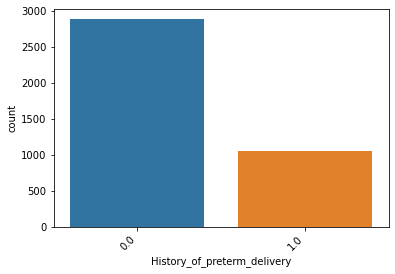

In [26]:
sns.countplot(sample_desc_deid['History_of_preterm_delivery'])
plt.xticks(rotation = 45, ha = 'right')

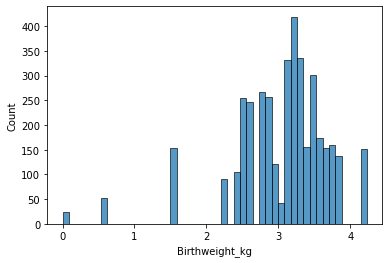

In [32]:
sns.histplot(data=sample_desc_deid, x="Birthweight_kg")
plt.savefig(basedir + '/birthweight.png')

<AxesSubplot:xlabel='Birthweight_kg', ylabel='Length_at_birth'>

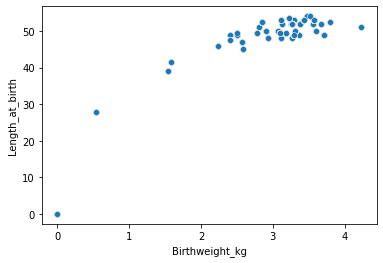

In [28]:
sns.scatterplot(data=sample_desc_deid, x="Birthweight_kg", y="Length_at_birth")

<AxesSubplot:xlabel='Birthweight_kg', ylabel='History_of_preterm_delivery'>

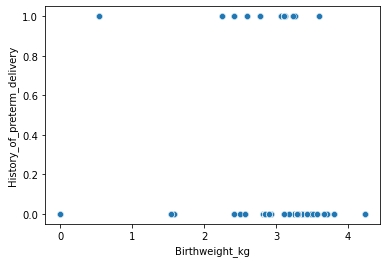

In [29]:
sns.scatterplot(data=sample_desc_deid, x="Birthweight_kg", y="History_of_preterm_delivery")

In [ ]:
Preterm = sample_desc_deid['History_of_preterm_delivery']
Not_Preterm = sample_desc_deid['History_of_preterm_delivery']

sns.countplot(sample_desc_deid['History_of_preterm_delivery'])
plt.xticks(rotation = 45, ha = 'right')

In [12]:
sample_desc_deid

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,...,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,F,...,1.0,Asian-Japanese,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided,run001,2,NaN,2
1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010104488.rs,GTCTGACAGTTG,GCACTCCTACGGGAGGCAGCA,Tooth_Gum,10101,311.0,45.0,4.0,F,1.0,F,...,1.0,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,287,NaN,4398
1002402218.ca2.rs,GTCTGGATAGCG,GCACTCCTACGGGAGGCAGCA,Stool,10024,150.0,22.0,2.0,F,0.0,F,...,1.0,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,288,15 min,4399
1002302248.bn1.rs,GTCTTCGTCGCT,GCACTCCTACGGGAGGCAGCA,Stool,10023,169.0,25.0,2.0,F,0.0,F,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,289,15 min,4400
